<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>What is the price of BNB converted to USDT ?</h3>


<h3>Import data</h3>
<p>
You can find the "BNB Cryptocurrency Dataset" from the following link: <a href="https://1824251045.rsc.cdn77.org/web/algohouse/data/BNBBUSD_trades_1m.csv">https://1824251045.rsc.cdn77.org/web/algohouse/data/BNBBUSD_trades_1m.csv</a>. 
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


You are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
import piplite
import micropip
from sklearn.metrics import mean_squared_error
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await micropip.install(['ipywidgets'],keep_going=True)
await micropip.install(['tqdm'],keep_going=True)

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
#set precision 
pd.set_option("display.precision", 2)
#set precision for float
pd.options.display.float_format = '{:.2f}'.format



This function will download the dataset into your browser


In [4]:
#This function will download the dataset into your browser 
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())



<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/corsera_da0101en_notebook_bottom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [5]:
filename = "https://1824251045.rsc.cdn77.org/web/algohouse/data/BNBBUSD_trades_1m.csv"

Then, we create a Python list <b>headers</b> containing name of headers.


In [6]:
headers = ["Ts","Open","High","Low","Close","Volume","Rec_count","Avg_price"]

you will need to download the dataset; if you are running locally, please comment out the following


In [7]:
await download(filename, "BNBBUSD_trades_1m.csv")
filename="BNBBUSD_trades_1m.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [8]:
df = pd.read_csv(filename,low_memory=False, index_col=0)
#create another data frame, to use in future
spoiled_df = pd.read_csv(filename,low_memory=False, index_col=0)

Use the method <b>head()</b> to display the first five rows of the dataframe.


<h4>Make some values wrong</h4>

Often dataset is damaged, so lets damage our dataframe to learn how to renew data

In [9]:
#Columns to hurt
cols = ['open', 'rec_count', 'close']
#We hurt columns one by one
for col in cols:
        #Get random value in range [0,1]
        m = np.random.rand(len(df))
        #Set coefficients.
        l1 = 0.05 # NaN
        l2 = 0.03 # Text
        l3 = 0.04 # Negative
        
        
        mask1 = m < l1 # NaN
        mask2 = (m >= l1) & (m < l1+l2) # Text
        mask3 = (m >= l1+l2) & (m < l1+l2+l3) # Negative
        
        #Change data
        spoiled_df.loc[mask1, col] = np.NaN
        spoiled_df.loc[mask2, col] = "?"
        spoiled_df.loc[mask3, col] = spoiled_df.loc[mask3, col]


In [10]:
# To see what the data set looks like, we'll use the head() method.
spoiled_df.head(50)

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,284.08,284.08,282.31,282.31,2047.23,62.00,283.24
1,2022-11-11 14:39:00,282.22,282.42,281.61,281.73,791.29,67.00,282.08
2,2022-11-11 14:40:00,281.73,282.33,281.23,281.71,734.08,60.00,281.68
3,2022-11-11 14:41:00,281.45,281.61,280.73,281.59,1855.34,66.00,281.22
4,2022-11-11 14:42:00,281.72,282.25,281.38,281.38,2878.22,61.00,281.91
5,2022-11-11 14:43:00,281.34,282.17,281.27,281.71,232.52,52.00,281.84
6,2022-11-11 14:44:00,281.74,282.41,281.74,282.41,225.26,44.00,282.23
7,2022-11-11 14:45:00,282.54,285.49,282.54,285.48,4273.81,87.00,284.17
8,2022-11-11 14:46:00,285.98,285.98,284.34,285.94,2158.12,83.00,285.06
9,2022-11-11 14:47:00,285.97,293.00,285.96,290.49,6091.80,101.00,289.20


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the our dataset, missing data comes with the question mark "?", negative values and NaN(Not a Number).
We replace "?" and negative values by NaN, Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [48]:
import numpy as np

# replace "?" with NaN
spoiled_df.replace("?", np.nan, inplace = True)

# replace negative values with NaN
num = df._get_numeric_data()
num[num < 0] = np.nan

#Lets see our result
spoiled_df.head(50)

,ts,open,high,low,close,volume,rec_count,avg_price,open_USDT,high_USDT,close-binned
0,2022-11-11 14:38:00,284.08,0.89,0.89,282.31,2047.23,62,283.24,88775.00,88775.00,Medium
1,2022-11-11 14:39:00,282.22,0.89,0.89,281.73,791.29,67,282.08,88193.75,88256.25,Medium
2,2022-11-11 14:40:00,281.73,0.89,0.89,281.71,734.08,60,281.68,88040.62,88228.12,Medium
3,2022-11-11 14:41:00,281.45,0.89,0.89,281.59,1855.34,66,281.22,87953.12,88003.12,Medium
4,2022-11-11 14:42:00,281.72,0.89,0.89,281.38,2878.22,61,281.91,88037.50,88203.12,Medium
5,2022-11-11 14:43:00,281.34,0.89,0.89,281.71,232.52,52,281.84,87918.75,88178.12,Medium
6,2022-11-11 14:44:00,281.74,0.89,0.89,282.41,225.26,44,282.23,88043.75,88253.12,Medium
7,2022-11-11 14:45:00,282.54,0.90,0.89,285.48,4273.81,87,284.17,88293.75,89215.62,High
8,2022-11-11 14:46:00,285.98,0.90,0.90,285.94,2158.12,83,285.06,89368.75,89368.75,High
9,2022-11-11 14:47:00,285.97,0.92,0.90,290.49,6091.80,101,289.20,89365.62,91562.50,High


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [12]:
missing_data = spoiled_df.isnull()
missing_data.head(5)

,ts,open,high,low,close,volume,rec_count,avg_price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

ts
False    67212
Name: ts, dtype: int64

open
False    61864
True      5348
Name: open, dtype: int64

high
False    67212
Name: high, dtype: int64

low
False    67212
Name: low, dtype: int64

close
False    61765
True      5447
Name: close, dtype: int64

volume
False    67212
Name: volume, dtype: int64

rec_count
False    62013
True      5199
Name: rec_count, dtype: int64

avg_price
False    67212
Name: avg_price, dtype: int64



Based on the summary above, each column has 67212 rows of data and seven of the columns containing missing data:

<ol>
    <li>"open": ~5 200 missing data</li>
    <li>"close": ~5 200 missing data</li>
    <li>"rec_count": ~5 200 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"rec_count": ~5 200 missing data</li>
</ul>

<b>Replace by interpolation:</b>

<ul>
    <li>"open": ~5 000 missing data</li>
    <li>"close": ~5 200 missing data</li>
</ul>



<h4>Calculate the mean value for the "normalized-losses" column </h4>


In [14]:
avg_norm_loss = spoiled_df["rec_count"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 19.99454952993727


<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>


In [15]:
spoiled_df["rec_count"].replace(np.nan, avg_norm_loss, inplace=True)
df.head(10)

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,284.08,284.08,282.31,282.31,2047.23,62,283.24
1,2022-11-11 14:39:00,282.22,282.42,281.61,281.73,791.29,67,282.08
2,2022-11-11 14:40:00,281.73,282.33,281.23,281.71,734.08,60,281.68
3,2022-11-11 14:41:00,281.45,281.61,280.73,281.59,1855.34,66,281.22
4,2022-11-11 14:42:00,281.72,282.25,281.38,281.38,2878.22,61,281.91
5,2022-11-11 14:43:00,281.34,282.17,281.27,281.71,232.52,52,281.84
6,2022-11-11 14:44:00,281.74,282.41,281.74,282.41,225.26,44,282.23
7,2022-11-11 14:45:00,282.54,285.49,282.54,285.48,4273.81,87,284.17
8,2022-11-11 14:46:00,285.98,285.98,284.34,285.94,2158.12,83,285.06
9,2022-11-11 14:47:00,285.97,293.00,285.96,290.49,6091.80,101,289.20


<h4>Fill all NaN in the "open" column by interpolating</h4>
Check which method is better for our dataset:

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Setting precision
pd.set_option("display.precision", 10)
# Methods without order
methods = ["linear", "nearest", "slinear", "quadratic", "cubic", "piecewise_polynomial", "pchip", "akima", "cubicspline"]
# Methods with order
order_methods = ["spline", "polynomial"]
performance = pd.DataFrame({"name": [], "MSE": [], "MAPE": []})
#test all methods for func 'pabdas.interpolate'
for method in methods:
    #Find all NaN values in spoiled_df['close']
    nan_rows = spoiled_df["close"].isna()
    #Renew data with pandas.interpolate(). We use only one method at the same time
    interpolated_close = spoiled_df["close"].interpolate(method=method)
    #Calculate squared error between real and renewed data
    mse = mean_squared_error(df.loc[nan_rows, "close"], interpolated_close[nan_rows])
    #Calculate absolute percentage error between real and renewed data
    mape = mean_absolute_percentage_error(df.loc[nan_rows, "close"], interpolated_close[nan_rows])
    #Write new data in new data frame 
    performance.loc[len(performance.index)] = [method, mse, mape]
for method in order_methods:
    for order in [3, 5]:
        # print(f"method: {method}, order: {order}")
        nan_rows = spoiled_df["close"].isna()
        #Renew data with pandas.interpolate(). We use only one method at the same time
        interpolated_close = spoiled_df["close"].interpolate(method=method, order=order)
        #Calculate squared error between real and renewed data
        mse = mean_squared_error(df.loc[nan_rows, "close"], interpolated_close[nan_rows])
        #Calculate absolute percentage error between real and renewed data
        mape = mean_absolute_percentage_error(df.loc[nan_rows, "close"], interpolated_close[nan_rows])
        #Write new data in сreated above data frame 
        performance.loc[len(performance.index)] = [f"{method}_{order}", mse, mape]

#Sort Data frame from low to high value to see the most usefull method          
performance = performance.sort_values(by=["MAPE", "MSE"], ascending=True)
#Convert "MAPE" column data to percents
performance["MAPE"] = performance["MAPE"] * 100
performance["MAPE"] = performance["MAPE"].astype("str") 
performance["MAPE"] = performance["MAPE"].str.slice(stop=8) + "%"
performance.head(15)

,name,MSE,MAPE
2,slinear,0.03,0.038642%
0,linear,0.03,0.038642%
5,piecewise_polynomial,0.03,0.038642%
6,pchip,0.03,0.038771%
7,akima,0.04,0.039384%
3,quadratic,0.04,0.043056%
8,cubicspline,0.04,0.044366%
4,cubic,0.04,0.044366%
11,polynomial_3,0.04,0.044366%
1,nearest,0.07,0.051634%


So, 'linear' method is one of the best methods for us, we will use it 

In [55]:
#Lets see data before interpolation
spoiled_df.head(20)

,ts,open,high,low,close,volume,rec_count,avg_price,open_USDT,high_USDT,close-binned
0,2022-11-11 14:38:00,284.08,0.89,0.89,282.31,2047.23,62,283.24,88775.00,88775.00,Medium
1,2022-11-11 14:39:00,282.22,0.89,0.89,281.73,791.29,67,282.08,88193.75,88256.25,Medium
2,2022-11-11 14:40:00,281.73,0.89,0.89,281.71,734.08,60,281.68,88040.62,88228.12,Medium
3,2022-11-11 14:41:00,281.45,0.89,0.89,281.59,1855.34,66,281.22,87953.12,88003.12,Medium
4,2022-11-11 14:42:00,281.72,0.89,0.89,281.38,2878.22,61,281.91,88037.50,88203.12,Medium
5,2022-11-11 14:43:00,281.34,0.89,0.89,281.71,232.52,52,281.84,87918.75,88178.12,Medium
6,2022-11-11 14:44:00,281.74,0.89,0.89,282.41,225.26,44,282.23,88043.75,88253.12,Medium
7,2022-11-11 14:45:00,282.54,0.90,0.89,285.48,4273.81,87,284.17,88293.75,89215.62,High
8,2022-11-11 14:46:00,285.98,0.90,0.90,285.94,2158.12,83,285.06,89368.75,89368.75,High
9,2022-11-11 14:47:00,285.97,0.92,0.90,290.49,6091.80,101,289.20,89365.62,91562.50,High


In [56]:
spoiled_df['close'] = spoiled_df["close"].interpolate(method='linear')

pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:.2f}'.format

#Lets see data after interpolation
spoiled_df.head(20)

,ts,open,high,low,close,volume,rec_count,avg_price,open_USDT,high_USDT,close-binned
0,2022-11-11 14:38:00,284.08,0.89,0.89,282.31,2047.23,62,283.24,88775.00,88775.00,Medium
1,2022-11-11 14:39:00,282.22,0.89,0.89,281.73,791.29,67,282.08,88193.75,88256.25,Medium
2,2022-11-11 14:40:00,281.73,0.89,0.89,281.71,734.08,60,281.68,88040.62,88228.12,Medium
3,2022-11-11 14:41:00,281.45,0.89,0.89,281.59,1855.34,66,281.22,87953.12,88003.12,Medium
4,2022-11-11 14:42:00,281.72,0.89,0.89,281.38,2878.22,61,281.91,88037.50,88203.12,Medium
5,2022-11-11 14:43:00,281.34,0.89,0.89,281.71,232.52,52,281.84,87918.75,88178.12,Medium
6,2022-11-11 14:44:00,281.74,0.89,0.89,282.41,225.26,44,282.23,88043.75,88253.12,Medium
7,2022-11-11 14:45:00,282.54,0.90,0.89,285.48,4273.81,87,284.17,88293.75,89215.62,High
8,2022-11-11 14:46:00,285.98,0.90,0.90,285.94,2158.12,83,285.06,89368.75,89368.75,High
9,2022-11-11 14:47:00,285.97,0.92,0.90,290.49,6091.80,101,289.20,89365.62,91562.50,High


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, interpolate NaN in "open" column with linear mehod.</b>

</div>


In [19]:
# Write your code below and press Shift+Enter to execute 

<details><summary>Click here for the solution</summary>

```python
spoiled_df['open'] = spoiled_df["open"].interpolate(method='linear')
```

</details>


To see which values are present in a particular column, we can use the ".value_counts()" method:


In [20]:
#We don't need "Spoiled_df" any more, because its reneved, lets contain it to our "df" dataframe   
df = spoiled_df

df['close'].value_counts()

245.91    63
289.73    56
290.06    52
289.90    51
245.76    50
          ..
288.68     1
288.63     1
289.00     1
289.25     1
246.16     1
Name: close, Length: 10883, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [21]:
df['close'].value_counts().idxmax()

245.91

Finally, let's drop all rows that do not have price data:


In [22]:
# simply drop whole row with NaN in "open" column
df.dropna(subset=["open"], axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

In [23]:
df.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,284.08,284.08,282.31,282.31,2047.23,62.00,283.24
1,2022-11-11 14:39:00,282.22,282.42,281.61,281.73,791.29,67.00,282.08
2,2022-11-11 14:40:00,281.73,282.33,281.23,281.71,734.08,60.00,281.68
3,2022-11-11 14:41:00,281.45,281.61,280.73,281.59,1855.34,66.00,281.22
4,2022-11-11 14:42:00,281.72,282.25,281.38,281.38,2878.22,61.00,281.91


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [24]:
df.dtypes

ts            object
open         float64
high         float64
low          float64
close        float64
volume       float64
rec_count    float64
avg_price    float64
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'rec_count' variable are numerical value that describe counnt of records, expect them to be of the type 'int'; however, it is shown as type 'float'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [25]:
df["rec_count"] = df["rec_count"].astype("int")
df["ts"]= pd.to_datetime(df['ts'])

<h4>Let us list the columns after the conversion</h4>


In [26]:
df.dtypes

ts            object
open         float64
high         float64
low          float64
close        float64
volume       float64
rec_count      int32
avg_price    float64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform BNB to USDT:</p>
<p>We will need to apply <b>data transformation</b> to transform BNB into USDT.</p>


<p>The formula for unit conversion is:<p>
1 BNB = 303 USDT (26.01.2023)
<p>We can do many mathematical operations directly in Pandas.</p>


In [27]:
df.head()

,ts,open,high,low,close,volume,rec_count,avg_price
0,2022-11-11 14:38:00,284.08,284.08,282.31,282.31,2047.23,62,283.24
1,2022-11-11 14:39:00,282.22,282.42,281.61,281.73,791.29,67,282.08
2,2022-11-11 14:40:00,281.73,282.33,281.23,281.71,734.08,60,281.68
3,2022-11-11 14:41:00,281.45,281.61,280.73,281.59,1855.34,66,281.22
4,2022-11-11 14:42:00,281.72,282.25,281.38,281.38,2878.22,61,281.91


In [28]:
# Convert BNB to USDT by mathematical operation
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=BNB&toAsset=USDT")
# If the api is unavailable we set fixed rate
if res.status != 200:
    rate = 0.0033
else:
    # Converting json to dict
    res = await res.json()
    # Get rate USTD to BNB
    rate = float(res[0]["fromAssetMinAmount"])
#1/rate makes rate correct in that case. We have  BNB to USDT rate now.    
print(f"The exchange rate is 1 BNB = {1/rate} USDT")

df["open_USDT"] = df["open"] / rate
#Lets  check our data
df.head()

The exchange rate is 1 BNB = 312.5 USDT


,ts,open,high,low,close,volume,rec_count,avg_price,open_USDT
0,2022-11-11 14:38:00,284.08,284.08,282.31,282.31,2047.23,62,283.24,88775.00
1,2022-11-11 14:39:00,282.22,282.42,281.61,281.73,791.29,67,282.08,88193.75
2,2022-11-11 14:40:00,281.73,282.33,281.23,281.71,734.08,60,281.68,88040.62
3,2022-11-11 14:41:00,281.45,281.61,280.73,281.59,1855.34,66,281.22,87953.12
4,2022-11-11 14:42:00,281.72,282.25,281.38,281.38,2878.22,61,281.91,88037.50


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform BNB to USDT in column "high"</b>

</div>


In [29]:
# Write your code below and press Shift+Enter to execute 


The exchange rate is 1 BNB = 312.5 USDT


,ts,open,high,low,close,volume,rec_count,avg_price,open_USDT,high_USDT
0,2022-11-11 14:38:00,284.08,284.08,282.31,282.31,2047.23,62,283.24,88775.00,88775.00
1,2022-11-11 14:39:00,282.22,282.42,281.61,281.73,791.29,67,282.08,88193.75,88256.25
2,2022-11-11 14:40:00,281.73,282.33,281.23,281.71,734.08,60,281.68,88040.62,88228.12
3,2022-11-11 14:41:00,281.45,281.61,280.73,281.59,1855.34,66,281.22,87953.12,88003.12
4,2022-11-11 14:42:00,281.72,282.25,281.38,281.38,2878.22,61,281.91,88037.50,88203.12


<details><summary>Click here for the solution</summary>

```python
res = await pyfetch("https://api.binance.com/sapi/v1/convert/exchangeInfo?fromAsset=BNB&toAsset=USDT")
# If the api is unavailable we set fixed rate
if res.status != 200:
    rate = 0.0033
else:
    # Converting json to dict
    res = await res.json()
    rate = float(res[0]["fromAssetMinAmount"])
    
print(f"The exchange rate is 1 BNB = {1/rate} USDT")

df["high_USDT"] = df["high"] / rate
df.head()

```

</details>


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "high" and "low".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [30]:
df['high'].head(10)

0   284.08
1   282.42
2   282.33
3   281.61
4   282.25
5   282.17
6   282.41
7   285.49
8   285.98
9   293.00
Name: high, dtype: float64

In [31]:
# replace (original value) by (original value)/(maximum value)
df['high'] = df['high']/df['high'].max()
df['high'].head(10)

0   0.89
1   0.89
2   0.89
3   0.89
4   0.89
5   0.89
6   0.89
7   0.90
8   0.90
9   0.92
Name: high, dtype: float64

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "low".</b>

</div>


In [63]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df['low'] = df['low']/df['low'].max() 

# show the scaled columns
df[["high","low"]].head(10)

```

</details>


Here we can see we've normalized "High","Low" columns in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "close" is a real valued variable ranging from 200 to 320 and it has ~10900 unique values. What if we only care about the price difference between closing minute price(3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'close' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Convert data to correct format:


In [33]:

df.dtypes

ts           datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume              float64
rec_count             int32
avg_price           float64
open_USDT           float64
high_USDT           float64
dtype: object

Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.


Text(0.5, 1.0, 'close counts')

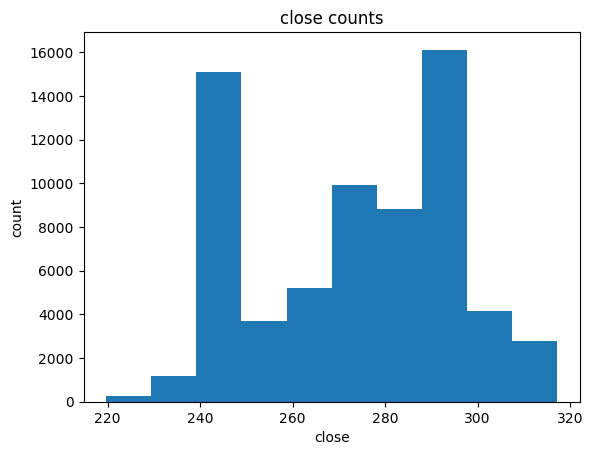

In [34]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["close"])

# set x/y labels and plot title
plt.pyplot.xlabel("close")
plt.pyplot.ylabel("count")
plt.pyplot.title("close counts")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of close, we want to set start_value = min(df["close"]).</p>
<p>Since we want to include the maximum value of close, we want to set end_value = max(df["close"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [35]:
bins = np.linspace(min(df["close"]), max(df["close"]), 4)
bins

array([219.7, 252.2, 284.7, 317.2])

We set group  names:


In [36]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['close']` belongs to.


In [37]:
df['close-binned'] = pd.cut(df['close'], bins, labels=group_names, include_lowest=True )
df[['close','close-binned']].head(20)

,close,close-binned
0,282.31,Medium
1,281.73,Medium
2,281.71,Medium
3,281.59,Medium
4,281.38,Medium
5,281.71,Medium
6,282.41,Medium
7,285.48,High
8,285.94,High
9,290.49,High


Let's see the number of vehicles in each bin:


In [38]:
df["close-binned"].value_counts().sort_index()

Low       18337
Medium    22575
High      26300
Name: close-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'close bins')

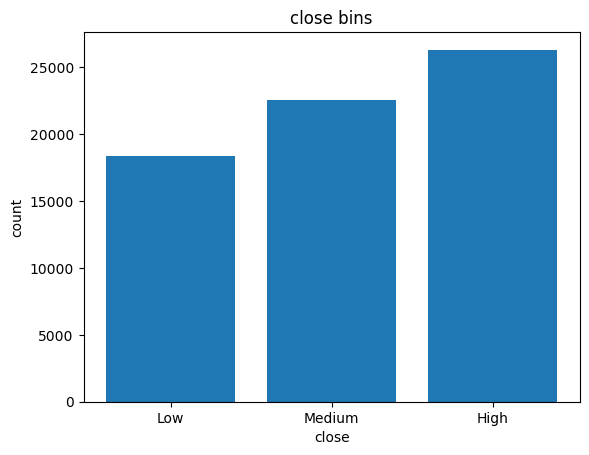

In [39]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["close-binned"].value_counts().sort_index())

# set x/y labels and plot title
plt.pyplot.xlabel("close")
plt.pyplot.ylabel("count")
plt.pyplot.title("close bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "close" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals from 17.000 to 26.000!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'close bins')

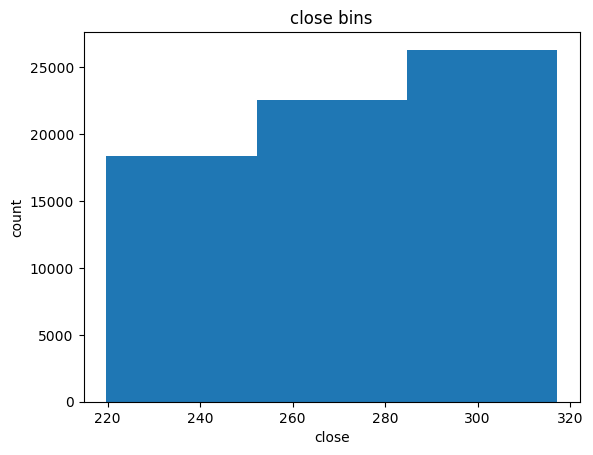

In [40]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "close" with bins = 3
plt.pyplot.hist(df["close"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("close")
plt.pyplot.ylabel("count")
plt.pyplot.title("close bins")

The plot above shows the binning result for the attribute "close".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "close-binned" has two unique values: "Low","Medium" and "High". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "open-binned" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [41]:
df.columns

Index(['ts', 'open', 'high', 'low', 'close', 'volume', 'rec_count',
       'avg_price', 'open_USDT', 'high_USDT', 'close-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [42]:
dummy_variable_1 = pd.get_dummies(df["close-binned"])
dummy_variable_1.head()

,Low,Medium,High
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


Change the column names for clarity:


In [43]:
dummy_variable_1.rename(columns={'Low':'close_low', 'Medium':'close_medium', 'High':'close_high'}, inplace=True)
dummy_variable_1.head()

,close_low,close_medium,close_high
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In the dataframe, column 'close-binned' has values for 'low','medium' and 'high' as 0s and 1s now.


In [44]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("close-binned", axis = 1, inplace=True)

The last three columns are now the indicator variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "rec_count"</b>

</div>


In [45]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
group_names = ['Low', 'Medium', 'High']

bins = np.linspace(min(df["rec_count"]), max(df["rec_count"]), 4)

df['rec_count-binned'] = pd.cut(df['rec_count'], bins, labels=group_names, include_lowest=True )
columns={'Low':'rec_count_low', 'Medium':'rec_count_medium', 'High':'rec_count_high'}

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['rec_count-binned'])

# change column names for clarity
dummy_variable_2.rename(columns={'Low':'rec_count_low', 'Medium':'rec_count_medium', 'High':'rec_count_high'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

```

</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe, then drop the column 'rec_count-binned'.</b>

</div>


In [46]:
# Write your code below and press Shift+Enter to execute 



<details><summary>Click here for the solution</summary>

```python
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('rec_count-binned', axis = 1, inplace=True)

df.head()

```

</details>


In [47]:
df.set_index('ts', inplace=True)
resample_df = pd.DataFrame()
resample_df['open'] = df['open'].resample('5min').first()
resample_df['high'] = df['high'].resample('5min').max()
resample_df['low'] = df['low'].resample('5min').min()
resample_df['close'] = df['close'].resample('5min').last()
resample_df['volume'] = df['volume'].resample('5min').sum()

resample_df.to_csv("resampl.csv")

#### Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
